#**IMPORT** **ALL** **NECESSARY** **LIBRARIES** 


In [198]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore") 

In [199]:
key='6322cd72a9c28927a423b2e5e4b3775bc431eb73'

In [200]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

In [201]:
df.to_csv('APPL.csv')

In [202]:
df=pd.read_csv('/content/APPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-11-25 00:00:00+00:00,111.79,111.870,110.95,111.130,11475922,26.303315,26.322138,26.105669,26.148022,45903688,0.0,1.0
1,AAPL,2016-11-28 00:00:00+00:00,111.57,112.465,111.39,111.430,27193983,26.251550,26.462137,26.209198,26.218609,108775932,0.0,1.0
2,AAPL,2016-11-29 00:00:00+00:00,111.46,112.030,110.07,110.780,28528750,26.225668,26.359785,25.898612,26.065670,114115000,0.0,1.0
3,AAPL,2016-11-30 00:00:00+00:00,110.52,112.200,110.27,111.560,36162258,26.004494,26.399784,25.945671,26.249197,144649032,0.0,1.0
4,AAPL,2016-12-01 00:00:00+00:00,109.49,110.940,109.03,110.365,37086862,25.762143,26.103316,25.653908,25.968023,148347448,0.0,1.0


In [203]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-11-17 00:00:00+00:00,153.49,155.00,150.9900,150.995,88807000,153.49,155.00,150.9900,150.995,88807000,0.0,1.0
1254,AAPL,2021-11-18 00:00:00+00:00,157.87,158.67,153.0500,153.710,137827673,157.87,158.67,153.0500,153.710,137827673,0.0,1.0
1255,AAPL,2021-11-19 00:00:00+00:00,160.55,161.02,156.5328,157.650,117305597,160.55,161.02,156.5328,157.650,117305597,0.0,1.0
1256,AAPL,2021-11-22 00:00:00+00:00,161.02,165.70,161.0000,161.680,117467889,161.02,165.70,161.0000,161.680,117467889,0.0,1.0
1257,AAPL,2021-11-23 00:00:00+00:00,161.41,161.80,159.0601,161.120,96041899,161.41,161.80,159.0601,161.120,96041899,0.0,1.0


# **VISUALIZATION**

In [204]:
import plotly.graph_objects as go
from datetime import datetime
import pandas_datareader.data as web
import plotly.express as px


**OHLC Plot**

In [205]:

fig1 = go.Figure(data=go.Ohlc(x=df['date'],
                    open=df['open'],
                    high=df['high'],
                    low=df['low'],
                    close=df['close']))

fig1.update_layout(xaxis_rangeslider_visible=False)
fig1.show()

**CANDELSTICKS PLOT**

In [206]:

fig2 = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])
fig2.update_layout(xaxis_rangeslider_visible=False)
fig2.show()

**AREA CHART**

In [207]:

fig3 = px.area(df, x="date", y="close",)
 
fig3.show()

**Time Series**

In [208]:
fig4 = go.Figure([go.Scatter(x=df['date'], y=df['high'])])
fig4.show()

**Adj Close values with respect to a set of days**

closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings

<Figure size 1080x576 with 0 Axes>

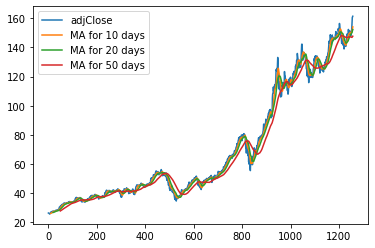

In [209]:

ma_day = [10, 20, 50]

for ma in ma_day:
  
        column_name = f"MA for {ma} days"
        df[column_name] = df['adjClose'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=0, ncols=0)
fig.set_figheight(8)
fig.set_figwidth(15)

df[['adjClose', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()



**DAILY RETURNS**

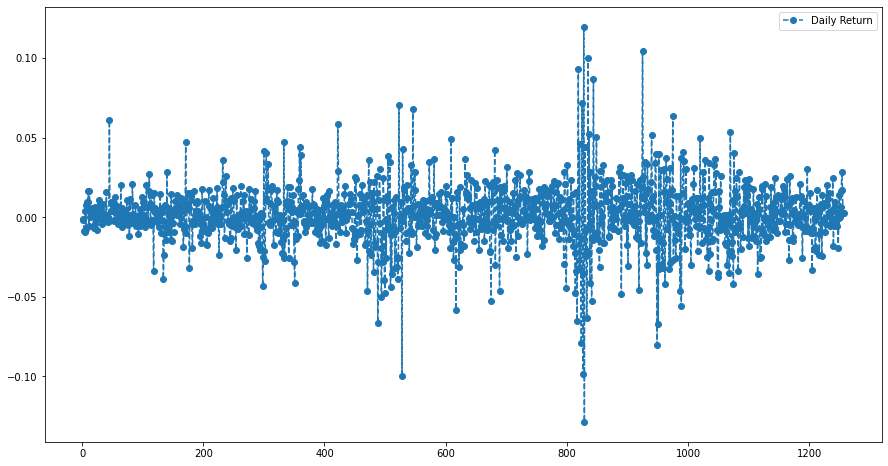

In [210]:
# We'll use pct_change to find the percent change for each day

df['Daily Return'] = df['adjClose'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=0, ncols=0)
fig.set_figheight(8)
fig.set_figwidth(15)

df['Daily Return'].plot(legend=True, linestyle='--', marker='o')


**CLOSE PRICE HISTORY**

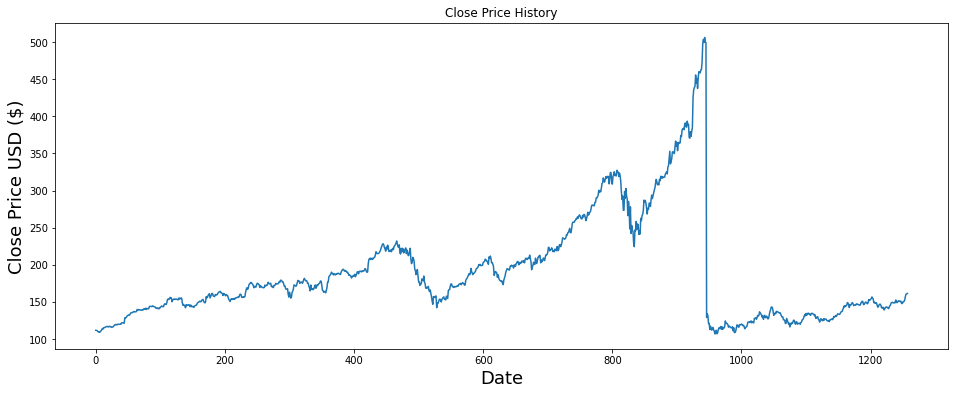

In [211]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

SHAPE OF DATASET

In [212]:
df.shape

(1258, 18)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symbol          1258 non-null   object 
 1   date            1258 non-null   object 
 2   close           1258 non-null   float64
 3   high            1258 non-null   float64
 4   low             1258 non-null   float64
 5   open            1258 non-null   float64
 6   volume          1258 non-null   int64  
 7   adjClose        1258 non-null   float64
 8   adjHigh         1258 non-null   float64
 9   adjLow          1258 non-null   float64
 10  adjOpen         1258 non-null   float64
 11  adjVolume       1258 non-null   int64  
 12  divCash         1258 non-null   float64
 13  splitFactor     1258 non-null   float64
 14  MA for 10 days  1249 non-null   float64
 15  MA for 20 days  1239 non-null   float64
 16  MA for 50 days  1209 non-null   float64
 17  Daily Return    1257 non-null   f

In [214]:
df.drop(['MA for 10 days','MA for 20 days','MA for 50 days','Daily Return'],inplace=True,axis=1)

In [215]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,188.705640,190.499778,186.660794,188.483804,4.884856e+07,70.589482,71.296896,69.807603,70.535783,1.205280e+08,0.009380,1.002385
std,70.363699,71.147530,69.238946,70.081150,3.838471e+07,39.118504,39.561846,38.634311,39.111162,5.589807e+07,0.079172,0.084583
min,106.840000,110.030000,103.100000,104.540000,1.136204e+07,25.672732,25.889200,25.470380,25.686849,4.099995e+07,0.000000,1.000000
25%,142.815000,144.130000,141.675000,143.062500,2.369961e+07,40.905345,41.281170,40.544912,40.849158,8.364698e+07,0.000000,1.000000
50%,170.415000,171.860000,169.120000,170.415000,3.319294e+07,51.089902,51.583646,50.684970,51.093572,1.055365e+08,0.000000,1.000000
75%,209.557500,211.997500,207.605000,209.870000,6.284655e+07,111.362710,113.200789,109.355443,111.776937,1.406886e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,161.410000,165.700000,161.000000,161.680000,4.479402e+08,0.820000,4.000000


CHECK FOR NULL VALUES

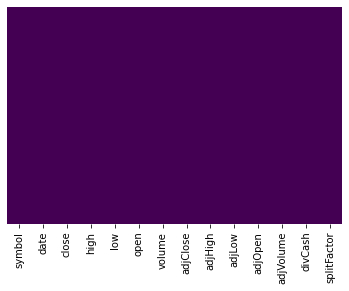

In [216]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [217]:
(df.isna().sum()/len(df))*100

symbol         0.0
date           0.0
close          0.0
high           0.0
low            0.0
open           0.0
volume         0.0
adjClose       0.0
adjHigh        0.0
adjLow         0.0
adjOpen        0.0
adjVolume      0.0
divCash        0.0
splitFactor    0.0
dtype: float64

# **Feature Engineering**





**HANDLING CATEGORICAL VALUES**

In [218]:
df['symbol'].unique()

array(['AAPL'], dtype=object)

We observe that the Column Symbol contains only one value. i,e. AAPL so label encoding will not be be benifit. 
Hence we can remove the entire column.

In [219]:
df.drop(['symbol'],inplace=True,axis=1)

In [220]:
#label_encoder = preprocessing.LabelEncoder()
#df['symbol']= label_encoder.fit_transform(df['symbol'])
#df['symbol'].unique()

In [221]:
df.shape

(1258, 13)

**Transformation of Date format**

In [222]:
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.date())
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-11-25,111.79,111.870,110.9500,111.130,11475922,26.303315,26.322138,26.105669,26.148022,45903688,0.0,1.0
1,2016-11-28,111.57,112.465,111.3900,111.430,27193983,26.251550,26.462137,26.209198,26.218609,108775932,0.0,1.0
2,2016-11-29,111.46,112.030,110.0700,110.780,28528750,26.225668,26.359785,25.898612,26.065670,114115000,0.0,1.0
3,2016-11-30,110.52,112.200,110.2700,111.560,36162258,26.004494,26.399784,25.945671,26.249197,144649032,0.0,1.0
4,2016-12-01,109.49,110.940,109.0300,110.365,37086862,25.762143,26.103316,25.653908,25.968023,148347448,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-17,153.49,155.000,150.9900,150.995,88807000,153.490000,155.000000,150.990000,150.995000,88807000,0.0,1.0
1254,2021-11-18,157.87,158.670,153.0500,153.710,137827673,157.870000,158.670000,153.050000,153.710000,137827673,0.0,1.0
1255,2021-11-19,160.55,161.020,156.5328,157.650,117305597,160.550000,161.020000,156.532800,157.650000,117305597,0.0,1.0
1256,2021-11-22,161.02,165.700,161.0000,161.680,117467889,161.020000,165.700000,161.000000,161.680000,117467889,0.0,1.0


In [223]:
print(f'Dataframe contains stock prices between {df.date.min()} {df.date.max()}')
print(f'Total days={(df.date.max()-df.date.min()).days} days')

Dataframe contains stock prices between 2016-11-25 2021-11-23
Total days=1824 days


**DROP DUPLICATE VALUES IF PRESENT**

In [224]:
df.drop_duplicates()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-11-25,111.79,111.870,110.9500,111.130,11475922,26.303315,26.322138,26.105669,26.148022,45903688,0.0,1.0
1,2016-11-28,111.57,112.465,111.3900,111.430,27193983,26.251550,26.462137,26.209198,26.218609,108775932,0.0,1.0
2,2016-11-29,111.46,112.030,110.0700,110.780,28528750,26.225668,26.359785,25.898612,26.065670,114115000,0.0,1.0
3,2016-11-30,110.52,112.200,110.2700,111.560,36162258,26.004494,26.399784,25.945671,26.249197,144649032,0.0,1.0
4,2016-12-01,109.49,110.940,109.0300,110.365,37086862,25.762143,26.103316,25.653908,25.968023,148347448,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-17,153.49,155.000,150.9900,150.995,88807000,153.490000,155.000000,150.990000,150.995000,88807000,0.0,1.0
1254,2021-11-18,157.87,158.670,153.0500,153.710,137827673,157.870000,158.670000,153.050000,153.710000,137827673,0.0,1.0
1255,2021-11-19,160.55,161.020,156.5328,157.650,117305597,160.550000,161.020000,156.532800,157.650000,117305597,0.0,1.0
1256,2021-11-22,161.02,165.700,161.0000,161.680,117467889,161.020000,165.700000,161.000000,161.680000,117467889,0.0,1.0


**CORRELATION**

In [225]:
c_df = df

In [226]:
c_df = c_df.drop(['adjClose'], axis = 1)

In [227]:
c_df.shape

(1258, 12)

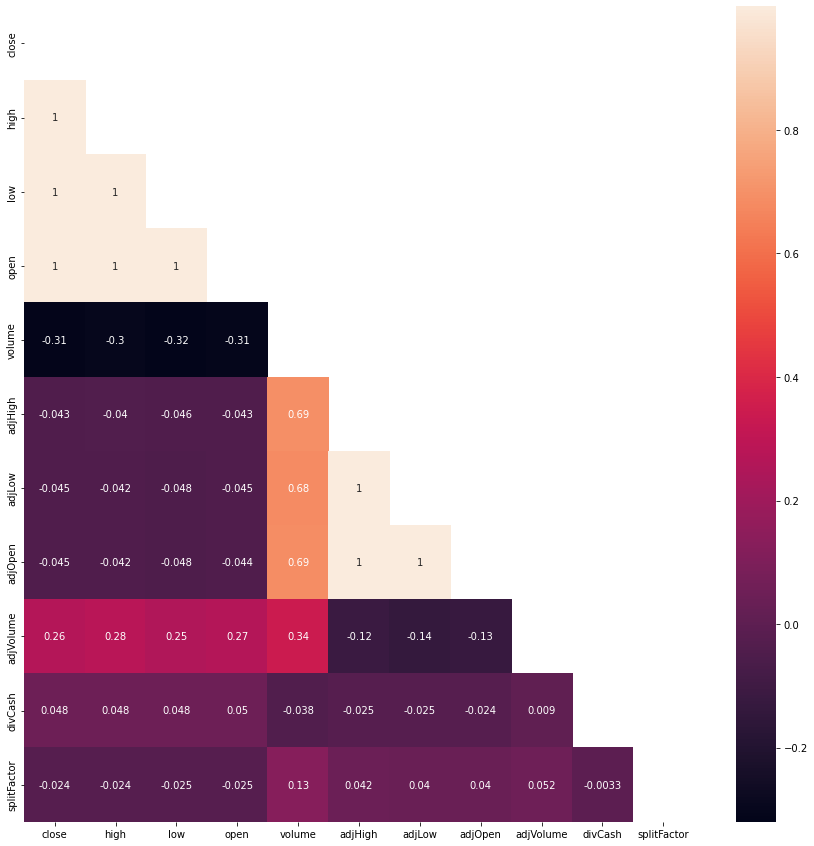

In [228]:
corr=c_df.corr()
plt.figure(figsize=(15,15))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

In [229]:
c_df.corr().style.background_gradient(cmap="coolwarm")

,close,high,low,open,volume,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
close,1.000000,0.999521,0.999529,0.999104,-0.311426,-0.042942,-0.044586,-0.044913,0.264469,0.047971,-0.023927
high,0.999521,1.000000,0.999313,0.999568,-0.302067,-0.040426,-0.042463,-0.042391,0.278870,0.047762,-0.023597
low,0.999529,0.999313,1.000000,0.999526,-0.319947,-0.046265,-0.047524,-0.047890,0.252990,0.048399,-0.024721
open,0.999104,0.999568,0.999526,1.000000,-0.309502,-0.043000,-0.044697,-0.044491,0.267112,0.049689,-0.024522
volume,-0.311426,-0.302067,-0.319947,-0.309502,1.000000,0.693922,0.680837,0.689594,0.339993,-0.038302,0.128391
adjHigh,-0.042942,-0.040426,-0.046265,-0.043000,0.693922,1.000000,0.999668,0.999810,-0.118465,-0.025169,0.041850
adjLow,-0.044586,-0.042463,-0.047524,-0.044697,0.680837,0.999668,1.000000,0.999734,-0.135259,-0.024798,0.040319
adjOpen,-0.044913,-0.042391,-0.047890,-0.044491,0.689594,0.999810,0.999734,1.000000,-0.125650,-0.024221,0.040433
adjVolume,0.264469,0.278870,0.252990,0.267112,0.339993,-0.118465,-0.135259,-0.125650,1.000000,0.009018,0.051982
divCash,0.047971,0.047762,0.048399,0.049689,-0.038302,-0.025169,-0.024798,-0.024221,0.009018,1.000000,-0.003343


**The following are the column pairs with higher correlation than the threshold: ( Threshold : 0.9)**


*   close -> open
*   close -> low
*   close -> high
*   low -> high
*   open -> high
*   open -> low
*   adjhigh -> adjopen
*   adjhigh -> adjlow
*   adjopen -> adjlow
*   close -> volume
*   high -> volume
*   low -> volume
*   open -> volume



**We remove the following columns**

* open
* low
* volume
* adjlow
* adjopen

**REMOVE UNNECESSARY COLUMNS**





In [230]:
df.drop(['adjLow','adjOpen','low','open','volume'],inplace=True,axis=1)

In [231]:
df.shape

(1258, 8)

In [232]:
df

,date,close,high,adjClose,adjHigh,adjVolume,divCash,splitFactor
0,2016-11-25,111.79,111.870,26.303315,26.322138,45903688,0.0,1.0
1,2016-11-28,111.57,112.465,26.251550,26.462137,108775932,0.0,1.0
2,2016-11-29,111.46,112.030,26.225668,26.359785,114115000,0.0,1.0
3,2016-11-30,110.52,112.200,26.004494,26.399784,144649032,0.0,1.0
4,2016-12-01,109.49,110.940,25.762143,26.103316,148347448,0.0,1.0
...,...,...,...,...,...,...,...,...
1253,2021-11-17,153.49,155.000,153.490000,155.000000,88807000,0.0,1.0
1254,2021-11-18,157.87,158.670,157.870000,158.670000,137827673,0.0,1.0
1255,2021-11-19,160.55,161.020,160.550000,161.020000,117305597,0.0,1.0
1256,2021-11-22,161.02,165.700,161.020000,165.700000,117467889,0.0,1.0


**CONVERTING TO INT DATATYPES**

In [233]:
df.dtypes

date            object
close          float64
high           float64
adjClose       float64
adjHigh        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

In [234]:
df.drop(['date'],inplace = True,axis=1)

**FEATURE SCALING**

**NORMALIZATION**

In [235]:
temp = df

In [236]:
names = temp.columns

scaler = preprocessing.MinMaxScaler()
nn_ds = scaler.fit_transform(temp)
nn_ds = pd.DataFrame(nn_ds, columns=names)

In [237]:
nn_ds

,close,high,adjClose,adjHigh,adjVolume,divCash,splitFactor
0,0.012398,0.004542,0.004646,0.003097,0.012050,0.0,0.0
1,0.011847,0.006011,0.004264,0.004098,0.166550,0.0,0.0
2,0.011572,0.004937,0.004074,0.003366,0.179670,0.0,0.0
3,0.009217,0.005357,0.002444,0.003652,0.254703,0.0,0.0
4,0.006637,0.002246,0.000659,0.001531,0.263792,0.0,0.0
...,...,...,...,...,...,...,...
1253,0.116844,0.111007,0.941652,0.923468,0.117479,0.0,0.0
1254,0.127815,0.120066,0.973920,0.949718,0.237941,0.0,0.0
1255,0.134527,0.125867,0.993664,0.966526,0.187511,0.0,0.0
1256,0.135704,0.137419,0.997127,1.000000,0.187910,0.0,0.0


**STANDARDIZATION**

In [238]:
from sklearn.preprocessing import StandardScaler

In [239]:
names = nn_ds.columns
ns_ds = StandardScaler().fit_transform(nn_ds) 
ns_ds = pd.DataFrame(data=ns_ds, columns=names)

In [240]:
ns_ds

,close,high,adjClose,adjHigh,adjVolume,divCash,splitFactor
0,-1.093550,-1.105605,-1.132553,-1.137274,-1.335537,-0.118523,-0.028205
1,-1.096678,-1.097239,-1.133877,-1.133733,-0.210324,-0.118523,-0.028205
2,-1.098242,-1.103355,-1.134539,-1.136322,-0.114772,-0.118523,-0.028205
3,-1.111606,-1.100965,-1.140195,-1.135310,0.431690,-0.118523,-0.028205
4,-1.126250,-1.118681,-1.146393,-1.142807,0.497880,-0.118523,-0.028205
...,...,...,...,...,...,...,...
1253,-0.500679,-0.499159,2.120058,2.116595,-0.567704,-0.118523,-0.028205
1254,-0.438407,-0.447555,2.232070,2.209398,0.309610,-0.118523,-0.028205
1255,-0.400304,-0.414512,2.300607,2.268822,-0.057670,-0.118523,-0.028205
1256,-0.393621,-0.348707,2.312626,2.387165,-0.054766,-0.118523,-0.028205


**SKEWNESS - OUTLIERS - KURTOSIS**

In [241]:
skew_features = ns_ds.apply(lambda x :x.skew()).sort_values(ascending=True)
skew_features

adjHigh         0.838827
adjClose        0.844799
close           1.734201
high            1.736100
adjVolume       2.010590
divCash         8.825747
splitFactor    35.468296
dtype: float64

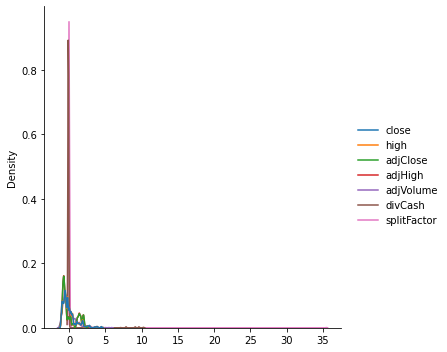

In [242]:
sns.displot(ns_ds, kind="kde", bw_adjust=.25)

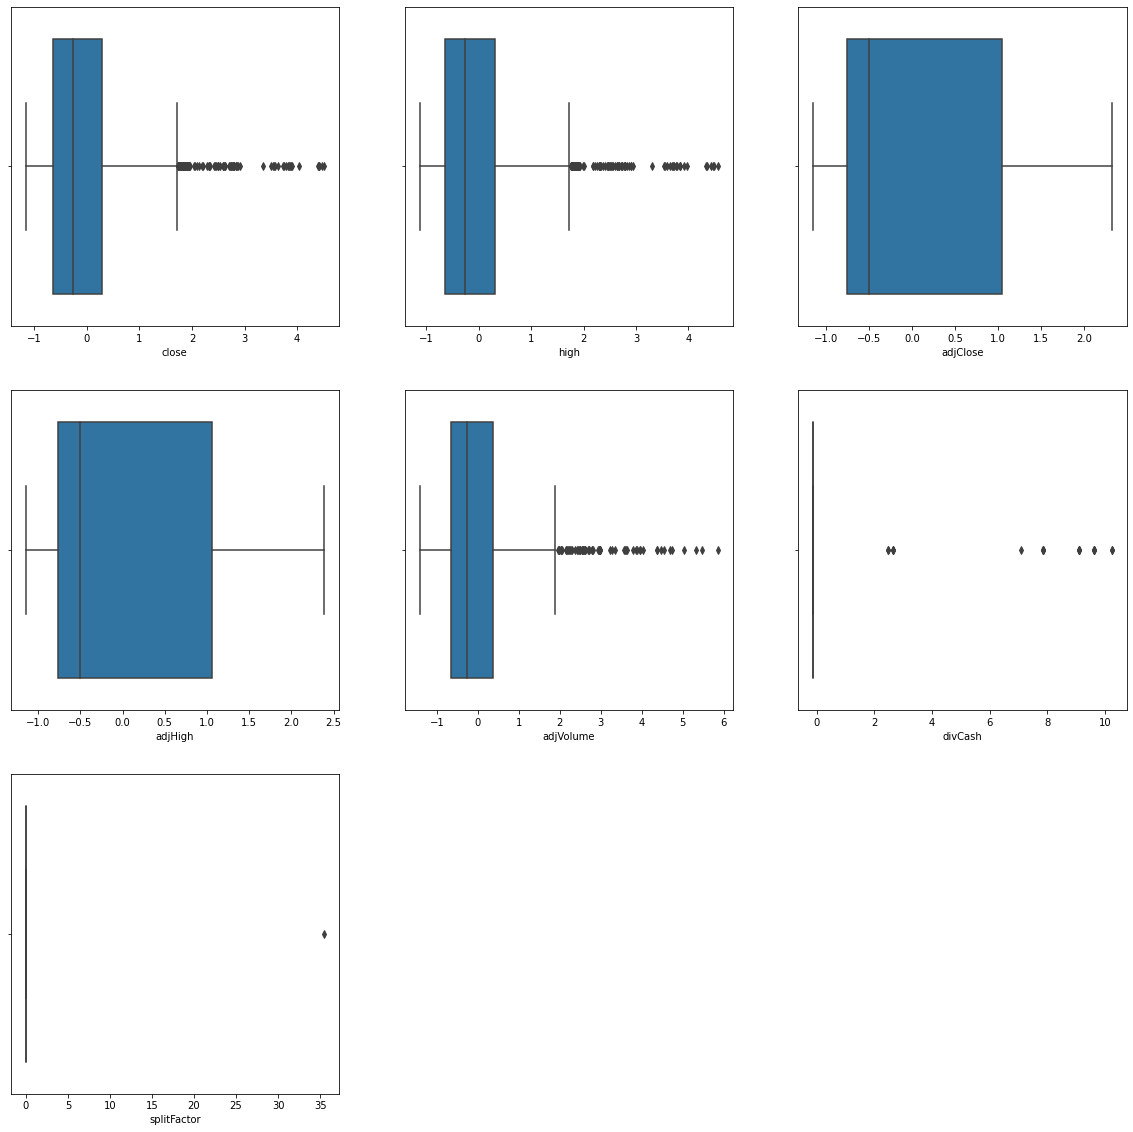

In [243]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(ns_ds['close'])
plt.subplot(3,3,2)
sns.boxplot(ns_ds['high'])
plt.subplot(3,3,3)
sns.boxplot(ns_ds['adjClose'])
plt.subplot(3,3,4)
sns.boxplot(ns_ds['adjHigh'])
plt.subplot(3,3,5)
sns.boxplot(ns_ds['adjVolume'])
plt.subplot(3,3,6)
sns.boxplot(ns_ds['divCash'])
plt.subplot(3,3,7)
sns.boxplot(ns_ds['splitFactor'])


***Removing skewness using log function***

In [244]:
out_cols_log = np.log(ns_ds)

In [245]:
out_cols_log

,close,high,adjClose,adjHigh,adjVolume,divCash,splitFactor
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,-0.840047,NaN,NaN
4,NaN,NaN,NaN,NaN,-0.697396,NaN,NaN
...,...,...,...,...,...,...,...
1253,NaN,NaN,0.751443,0.749808,NaN,NaN,NaN
1254,NaN,NaN,0.802929,0.792720,-1.172442,NaN,NaN
1255,NaN,NaN,0.833173,0.819261,NaN,NaN,NaN
1256,NaN,NaN,0.838384,0.870106,NaN,NaN,NaN


In [246]:
out_cols_log.skew()

close         -1.407045
high          -0.938266
adjClose      -1.996786
adjHigh       -2.005854
adjVolume     -1.470057
divCash       -1.144226
splitFactor         NaN
dtype: float64

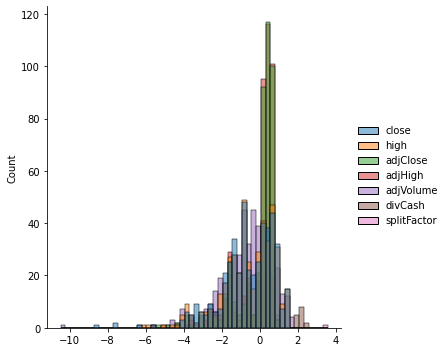

In [247]:
sns.displot(out_cols_log)

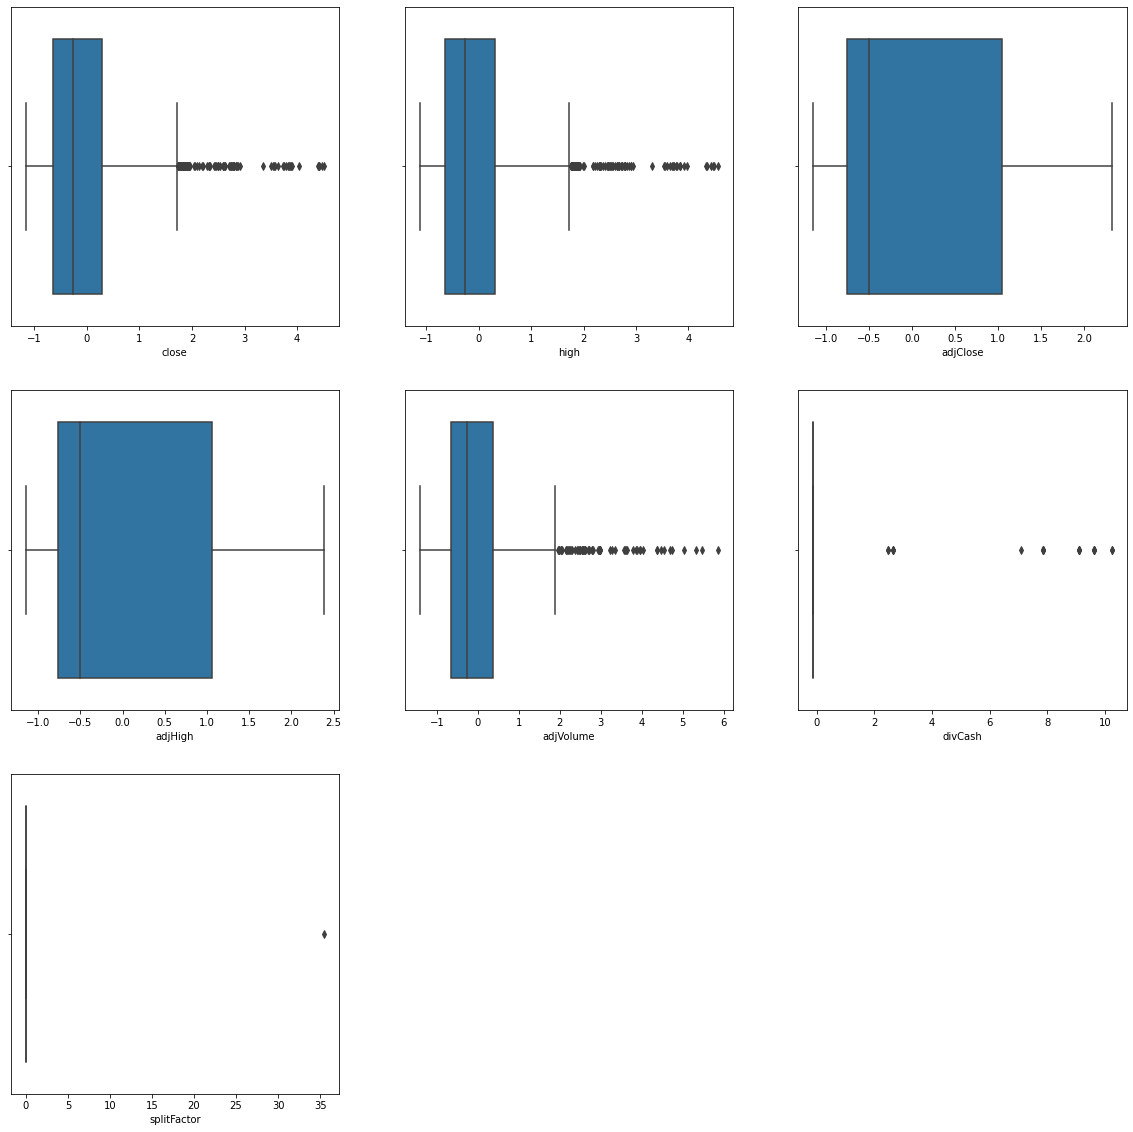

In [248]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(ns_ds['close'])
plt.subplot(3,3,2)
sns.boxplot(ns_ds['high'])
plt.subplot(3,3,3)
sns.boxplot(ns_ds['adjClose'])
plt.subplot(3,3,4)
sns.boxplot(ns_ds['adjHigh'])
plt.subplot(3,3,5)
sns.boxplot(ns_ds['adjVolume'])
plt.subplot(3,3,6)
sns.boxplot(ns_ds['divCash'])
plt.subplot(3,3,7)
sns.boxplot(ns_ds['splitFactor'])

***Remving skewness using IQR***

In [249]:
Q1 = ns_ds.quantile(0.25)
Q3 = ns_ds.quantile(0.75)

IQR = Q3 - Q1

t = ns_ds[~((ns_ds< (Q1 - 1.5 * IQR)) |(ns_ds > (Q3 + 1.5 * IQR))).any(axis=1)]

In [250]:
t.skew()

close          0.988482
high           0.989734
adjClose       0.922118
adjHigh        0.918356
adjVolume      0.807570
divCash        0.000000
splitFactor    0.000000
dtype: float64

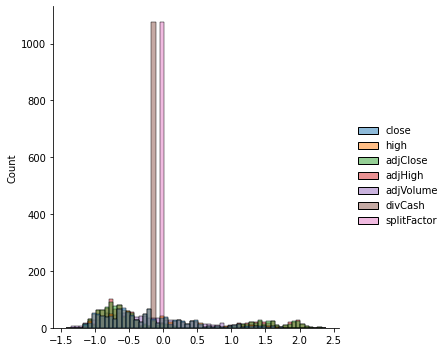

In [251]:
sns.displot(t)

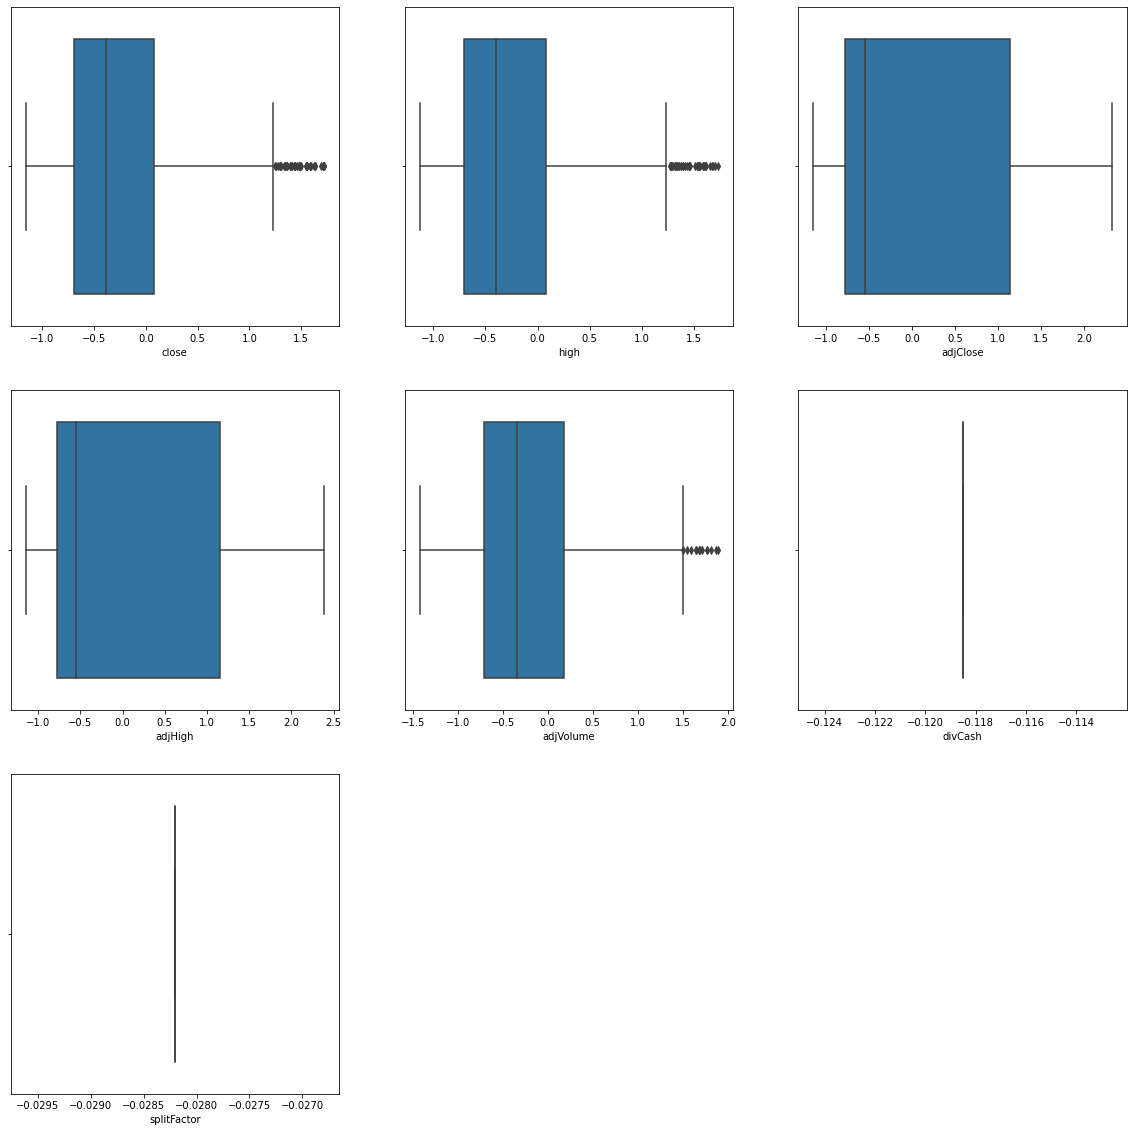

In [252]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(t['close'])
plt.subplot(3,3,2)
sns.boxplot(t['high'])
plt.subplot(3,3,3)
sns.boxplot(t['adjClose'])
plt.subplot(3,3,4)
sns.boxplot(t['adjHigh'])
plt.subplot(3,3,5)
sns.boxplot(t['adjVolume'])
plt.subplot(3,3,6)
sns.boxplot(t['divCash'])
plt.subplot(3,3,7)
sns.boxplot(t['splitFactor'])


***HENCE WE OBSERVE THAT ALMOST ALL THE OUTLIERS OF THE DATA HAVE BEEN REMOVED***

***We observe that compared to Log method IQR method is more efficient***

In [253]:
t

,close,high,adjClose,adjHigh,adjVolume,divCash,splitFactor
0,-1.093550,-1.105605,-1.132553,-1.137274,-1.335537,-0.118523,-0.028205
1,-1.096678,-1.097239,-1.133877,-1.133733,-0.210324,-0.118523,-0.028205
2,-1.098242,-1.103355,-1.134539,-1.136322,-0.114772,-0.118523,-0.028205
3,-1.111606,-1.100965,-1.140195,-1.135310,0.431690,-0.118523,-0.028205
4,-1.126250,-1.118681,-1.146393,-1.142807,0.497880,-0.118523,-0.028205
...,...,...,...,...,...,...,...
1253,-0.500679,-0.499159,2.120058,2.116595,-0.567704,-0.118523,-0.028205
1254,-0.438407,-0.447555,2.232070,2.209398,0.309610,-0.118523,-0.028205
1255,-0.400304,-0.414512,2.300607,2.268822,-0.057670,-0.118523,-0.028205
1256,-0.393621,-0.348707,2.312626,2.387165,-0.054766,-0.118523,-0.028205


#**EDA**

---



In [254]:
 import random
df['close'].sample(5).mean()


211.608

In [255]:
df['close'].sample(5).median()


187.18

In [256]:
df['close'].sample(5).mode()

0    115.08
1    143.34
2    143.68
3    216.36
4    265.58
dtype: float64

In [257]:
df_mean=df['close'].mean()
df_mean

188.70563990302054

In [258]:
df_median=df['close'].median()
df_median

170.415

In [259]:
df_mode=df['close'].mode()
df_mode

0    172.5
dtype: float64

In [260]:
df.shape


(1258, 7)

In [261]:
sum=0
i=int(0)
for i in range(0,1257):
 sum=sum+pow((df['close'].loc[i]- df_mean),2)
sum=sum/df.shape[0] 
sum
stddev=pow(sum,0.5)
stddev


70.33151632520901

In [262]:
df_close=df[['close','open']].agg([np.mean, np.std])
df_close.transpose()

KeyError: ignored

In [ ]:

df_close.transpose().plot(kind = "barh", y = "mean", legend = False,
            title = "Open and Close means")

In [ ]:
df_close.transpose().plot(kind = "barh", y = "mean", legend = False,
            title = "Open and Close Standard deviations",xerr = "std")

In [ ]:
variance=pow(stddev,2)
variance

Sampling

In [ ]:
samplemeans=[]
for i in range(100):
  samples= df['close'].sample(n=10)
  samplemean=np.mean(samples)
  samplemeans.append(samplemean)

samplemeans
np.mean(samplemeans)


In [ ]:
samples.plot(kind = "bar", x = "samplemeans", legend = True,
            title = "sample means")

In [ ]:
df['close'].corr(df['open'])

In [ ]:
n=int(input())
def systematic_sampling(df, step):
 
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
systematic_sample = systematic_sampling(df, n)
display(systematic_sample)

In [ ]:
systematic_data = round(systematic_sample['close'].mean())
print("Systematic sampling mean (for close)", systematic_data)

In [ ]:
systematic_data = round(systematic_sample['open'].mean())
print("Systematic sampling mean(for open) ", systematic_data)

# KURTOSIS

In [ ]:
normal = stats.norm.pdf(x_axis, mean_val,std_val)
#plt.plot(x_axis, normal);
plt.plot(x_axis,stats.laplace.pdf(x_axis, mean_val,std_val), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k')))
plt.plot(x_axis, normal, label='Mesokurtic (normal)')
print('Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(moments='k')))
plt.plot(x_axis,stats.cosine.pdf(x_axis,mean_val,std_val), label='Platykurtic')
print('Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(moments='k')))
plt.legend();

# Target Prediction (Close Value)

In [ ]:
target=150

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(np.mean(close,axis=1), 
             kde=False, label='Close')
ax.set_xlabel("Close Value",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(target, color='red')
plt.legend()
plt.tight_layout()

#**Hypthesis Testing**

---


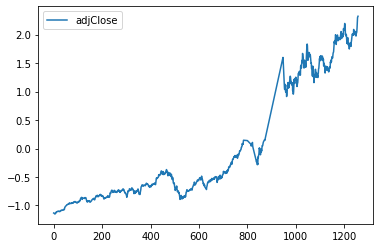

In [263]:
apple_stationarity=t[['adjClose']]
apple_stationarity.plot()

From the plotted graph we can say that the data doesn't have a constant average as there are leaps and troughs and also the variance is also different at different stages of the data. So our data is not stationary. We can also mathematically test for stationarity with adfuller test

#1.Augmented Dickey Fuller Test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used.

We interpret this result using the p-value from the test. 
A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Not to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [264]:
from statsmodels.tsa.stattools import adfuller
import scipy.stats as st

In [265]:
#Ho: Data is non stationary
#H1: Data is stationary
def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")



In [266]:
adfuller_test(apple_stationarity['adjClose'])

ADF Test Statistic : 0.6600616287455856
p-value : 0.9890061837953612
#Lags Used : 3
Number of Observations Used : 1073
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Since our p value is greater than 0.05 we need to accept the null hypothesis which states that our data is non-stationary

Stationarity Conversion with shift()
Now let's convert our non-stationary data to stationary with shift() method. Here we take a shift() of 1 day which means all the records will step down to one step and we take the difference from the original data. Since we see a trend in our data, when we subtract today's value from yesterday's value considering a trend it will leave a constant value on its way thus making the plot stationary.

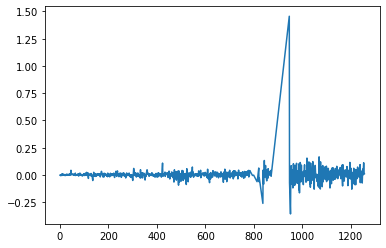

In [268]:
apple_stationarity['Close First Difference']=apple_stationarity['adjClose']-apple_stationarity['adjClose'].shift(1)
apple_stationarity['Close First Difference'].plot()

In [269]:
apple_stationarity=apple_stationarity['Close First Difference'].dropna()
adfuller_test(apple_stationarity)

ADF Test Statistic : -22.04872961102767
p-value : 0.0
#Lags Used : 2
Number of Observations Used : 1073
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


#2. Z - test
It is believed that a stock price for a Apple company will grow at a rate of 200 USD  per week with a standard deviation of 15 USD. An investor believes the stock won’t grow as quickly. The changes in stock price is recorded for ten weeks and are as follows: $40, $30, $20, $32, $15, $7, $25, $12, $15, $22. Perform a hypothesis test using a 5% level of significance. State the null and alternative hypotheses, state your conclusion, and identify the Type I errors.

In [274]:
#H0 : μ = 200   H1 : μ < 200 
d=pd.Series([40, 30,20,32,15,7,25,12,15,22])
n = 10
xbar = d.mean()
mu = 200
sigma = 15  
alpha = 0.05
z = (xbar - mu)/(sigma/np.sqrt(n))
p = (st.norm.cdf(z))
if(p<=alpha):
  rejection = 'Reject Null Hypothesis'
else:
  rejection = 'Accept Null Hypothesis'
print(rejection,round(z,2),p)

Reject Null Hypothesis -37.57 3.60023473595201e-309


p < 0.05 so we reject the null hypothesis.
There is sufficient evidence to suggest that the stock price of the company grows at a rate less than 200 USD a week.

Type I Error: To conclude that the stock price is growing slower than 200 USD a week when, in fact, the stock price is growing at 200 USD a week (reject the null hypothesis when the null hypothesis is true).
Type II Error: To conclude that the stock price is growing at a rate of 200 USD a week when, in fact, the stock price is growing slower than 200 USD a week (do not reject the null hypothesis when the null hypothesis is false).

# z-Test using P-value
The average closing price of the Apple stocks is 188.7 USD.Investors were interested in seeing if supply and demand affects the closing price.50 days of close price over a period of randomly selected weeks yielded a sample mean of 199.2 feet. The population standard deviation is known to be 70.4. Can it be concluded at the 0.05 level of significance that the average closing price has increased? Is there evidence of what caused this to happen?


In [273]:
#H0: μ=188.7
#H1: μ>188.7
#Initial variable here
n = 50
xbar=199.2
mu = 188.7
sigma = 70.4
alpha = 0.05
z = (xbar - mu)/(sigma/np.sqrt(n))
z_critical = abs(st.norm.ppf(0.05))
if(abs(z) < z_critical): 
  rejection = 'Accept Null Hypothesis'
else:
  rejection = 'Reject Null Hypothesis'
print(rejection, z, z_critical)

Accept Null Hypothesis 1.0546336935310723 1.6448536269514729


ztest < zcritcal so we do not reject the null hypothesis.
Thus there is no sufficient evidence to suggest that the average closing price has increased.